<h1><b>Mall Customer Segmentation Data Analysis and Clustering</b></h1>

<p id='1'><h3><b>Introduction</b></h3></p>


<p>This data set contains data for  market basket analysis.</p>

<p>The data contains:</p>
<ul>
    <li>Customer ID</li>    Unique ID assigned to the customer
    <li>Gender</li>         Gender of the customer
    <li>Age</li>            Age of the customer
    <li>Annual Income</li>  Annual Income of the customee
    <li>Spending Score</li> Score assigned by the mall based on customer behavior and spending nature
</ul>



# Libraries and data import

In [453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# #this helps to show the output of every line of code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# if last_exp then only print result of last experssion

In [394]:
# read data 
data=pd.read_csv('C:\\Users\\khanal\\Desktop\\clustering\\mall customers\\mall_customers.csv')

# Data information

In [395]:
# display first five rows.
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [396]:
# display only gender and age
data[['Gender','Age']].head()

,Gender,Age
0,Male,19
1,Male,21
2,Female,20
3,Female,23
4,Female,31


In [397]:
# display random data
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
98,99,Male,48,61,42
69,70,Female,32,48,47
35,36,Female,21,33,81
1,2,Male,21,15,81
179,180,Male,35,93,90


In [399]:
# random data for 0.05 %
data.sample(frac=0.05) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
159,160,Female,30,78,73
61,62,Male,19,46,55
176,177,Male,58,88,15
38,39,Female,36,37,26
160,161,Female,56,79,35
66,67,Female,43,48,50
122,123,Female,40,69,58
93,94,Female,40,60,40
8,9,Male,64,19,3
84,85,Female,21,54,57


In [400]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [401]:
# the analysis of numerical values.
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [402]:
# data types in the data set.
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [403]:
#show data's columns
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [404]:
# rename data's columns
data.rename(columns={'Spending Score (1-100)':'SpendingScore','Annual Income (k$)':'AnnualIncome'},inplace=True)
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [405]:
# data type 
data.dtypes

CustomerID        int64
Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

In [406]:
# data row and columns count
data.shape

(200, 5)

# Missing value analysis

In [407]:
# count null values
# differet ways to check
data.isnull().sum()
data.isnull().values.any()
print(list(data.isnull().any()))

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

False

[False, False, False, False, False]


In [408]:
# check for zero value
data.isin([0]).any().any()

False

# Data analysis and visualization

In [409]:
# data correlation
data.corr()

,CustomerID,Age,AnnualIncome,SpendingScore
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
AnnualIncome,0.977548,-0.012398,1.000000,0.009903
SpendingScore,0.013835,-0.327227,0.009903,1.000000


In [410]:
data.iloc[:,1:].corr()

,Age,AnnualIncome,SpendingScore
Age,1.000000,-0.012398,-0.327227
AnnualIncome,-0.012398,1.000000,0.009903
SpendingScore,-0.327227,0.009903,1.000000


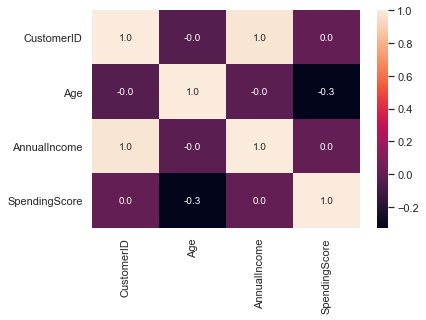

In [411]:
# heatmap of data correlation
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [412]:
#need to drop customerID
data.drop(['CustomerID'],axis =1, inplace=True)
data.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [413]:
#show data gender unique
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [414]:
#show gender value counts
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender Count')

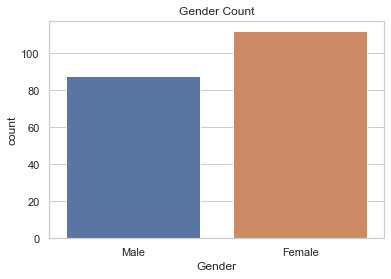

In [415]:
# show graph data gender
sns.countplot(data.Gender)
plt.title('Gender Count')
plt.show()

<Figure size 432x432 with 0 Axes>

([<matplotlib.patches.Wedge at 0x22ff8ba7488>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Male'),
  Text(0.2248575863318331, -1.1787446991902115, 'Female')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.13116692536023597, -0.6876010745276234, '44.0%')])

Text(0.5, 1.0, 'Race/Ethnicity According Analysis')

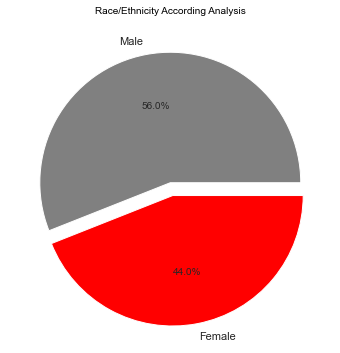

In [416]:
labels=data.Gender.unique()
colors=['gray','red']
explode=[0,0.1]
values=data.Gender.value_counts().values

#visualization
plt.figure(figsize=(6,6))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%0.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

<Figure size 1800x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text major ticklabel objects>)

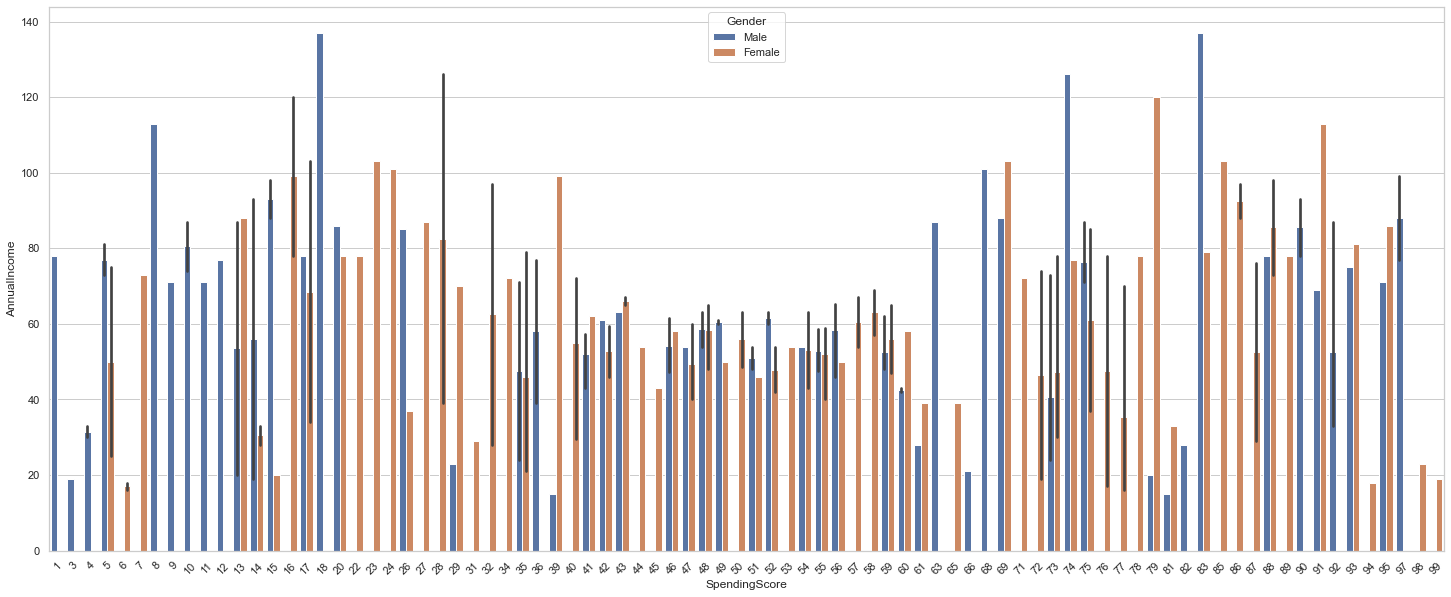

In [454]:
plt.figure(figsize=(25,10))
sns.barplot(x = "SpendingScore", y = "AnnualIncome", hue = "Gender", data = data)
plt.xticks(rotation=45)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FF8BFDDC8>,
      dtype=object)

Text(0.5, 1.0, 'All Data Show Histogram System')

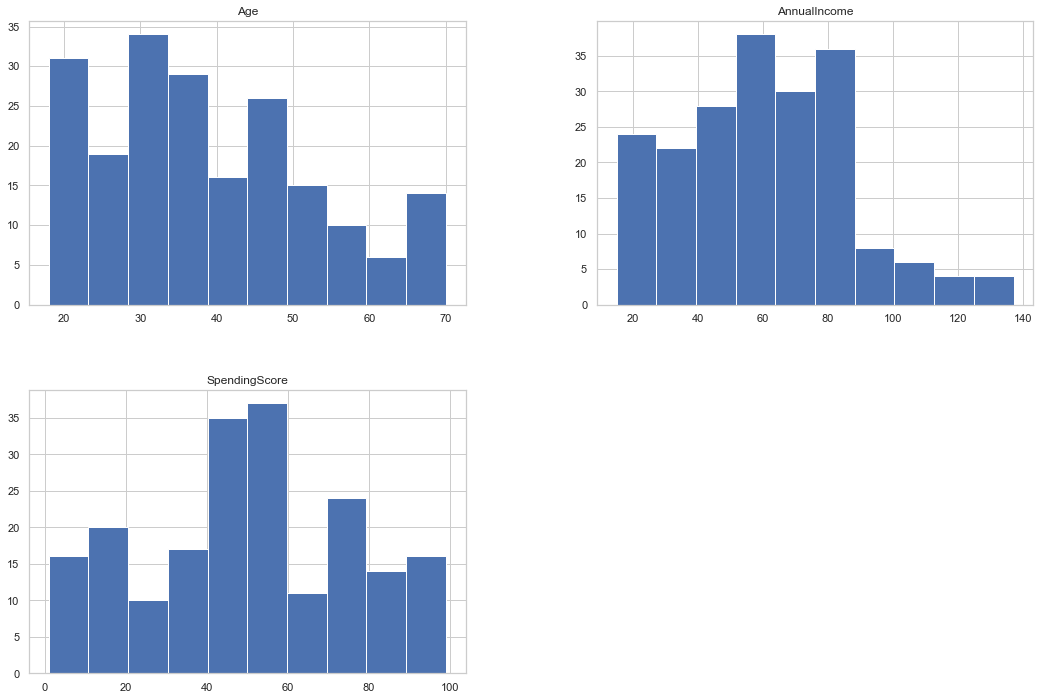

In [418]:
data.hist(figsize=(18,12))
plt.title('All Data Show Histogram System')
plt.show()

In [419]:
# Male Age 
print('max  :',max(data[data['Gender']=='Male'].Age))
print('Min  :',min(data[data['Gender']=='Male'].Age))
print('Mean :',np.mean(data[data['Gender']=='Male'].Age))
print('Std  :',np.std(data[data['Gender']=='Male'].Age))

max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472944


In [420]:
# Female Age
print('max  :',max(data[data['Gender']=='Female'].Age))
print('Min  :',min(data[data['Gender']=='Female'].Age))
print('Mean :',np.mean(data[data['Gender']=='Female'].Age))
print('Std  :',np.std(data[data['Gender']=='Female'].Age))

max  : 68
Min  : 18
Mean : 38.098214285714285
Std  : 12.587522039581055


In [421]:
# Male Income 
print('max  :',max(data[data['Gender']=='Male'].SpendingScore))
print('Min  :',min(data[data['Gender']=='Male'].SpendingScore))
print('Mean :',np.mean(data[data['Gender']=='Male'].SpendingScore))
print('Std  :',np.std(data[data['Gender']=='Male'].SpendingScore))

max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [422]:
# Female Income
print('max  :',max(data[data['Gender']=='Female'].SpendingScore))
print('Min  :',min(data[data['Gender']=='Female'].SpendingScore))
print('Mean :',np.mean(data[data['Gender']=='Female'].SpendingScore))
print('Std  :',np.std(data[data['Gender']=='Female'].SpendingScore))

max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.00705246880166


In [423]:
#Male SpendingScore 
print('max  :',max(data[data['Gender']=='Male'].SpendingScore))
print('Min  :',min(data[data['Gender']=='Male'].SpendingScore))
print('Mean :',np.mean(data[data['Gender']=='Male'].SpendingScore))
print('Std  :',np.std(data[data['Gender']=='Male'].SpendingScore))

max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [424]:
#Female SpendingScore
print('max  :',max(data[data['Gender']=='Female'].SpendingScore))
print('Min  :',min(data[data['Gender']=='Female'].SpendingScore))
print('Mean :',np.mean(data[data['Gender']=='Female'].SpendingScore))
print('Std  :',np.std(data[data['Gender']=='Female'].SpendingScore))

max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.00705246880166


In [425]:
data.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [426]:
print(len(data.Age.unique()))

51


In [427]:
data.Age.value_counts()[:10]

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
Name: Age, dtype: int64

<Figure size 1080x504 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Rate')

Text(0.5, 1.0, 'Age vs Rate State')

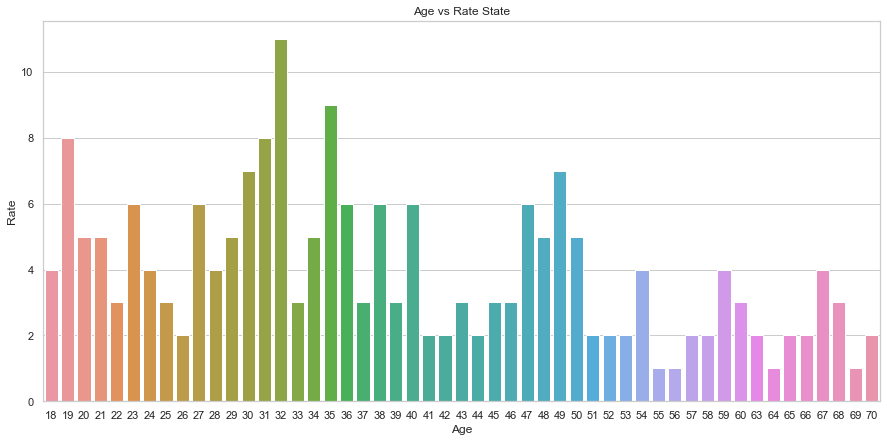

In [428]:
plt.figure(figsize=(15,7))
sns.barplot(x=data.Age.value_counts().index,y=data.Age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Rate')
plt.title('Age vs Rate State')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FF9069648>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

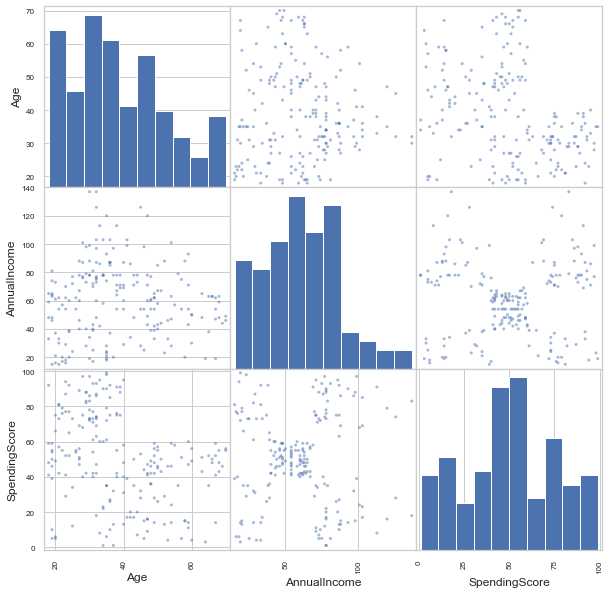

<Figure size 432x288 with 0 Axes>

In [429]:
pd.plotting.scatter_matrix(data,figsize=(10,10))
plt.figure()
plt.show()

In [430]:
age_income=[]
age_unique=data.Age.unique()
for age in age_unique:
    age_income.append(sum(data[data['Age']==age].SpendingScore))

Text(0.5, 0, 'Age & Income')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Age & Income for Frequency')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

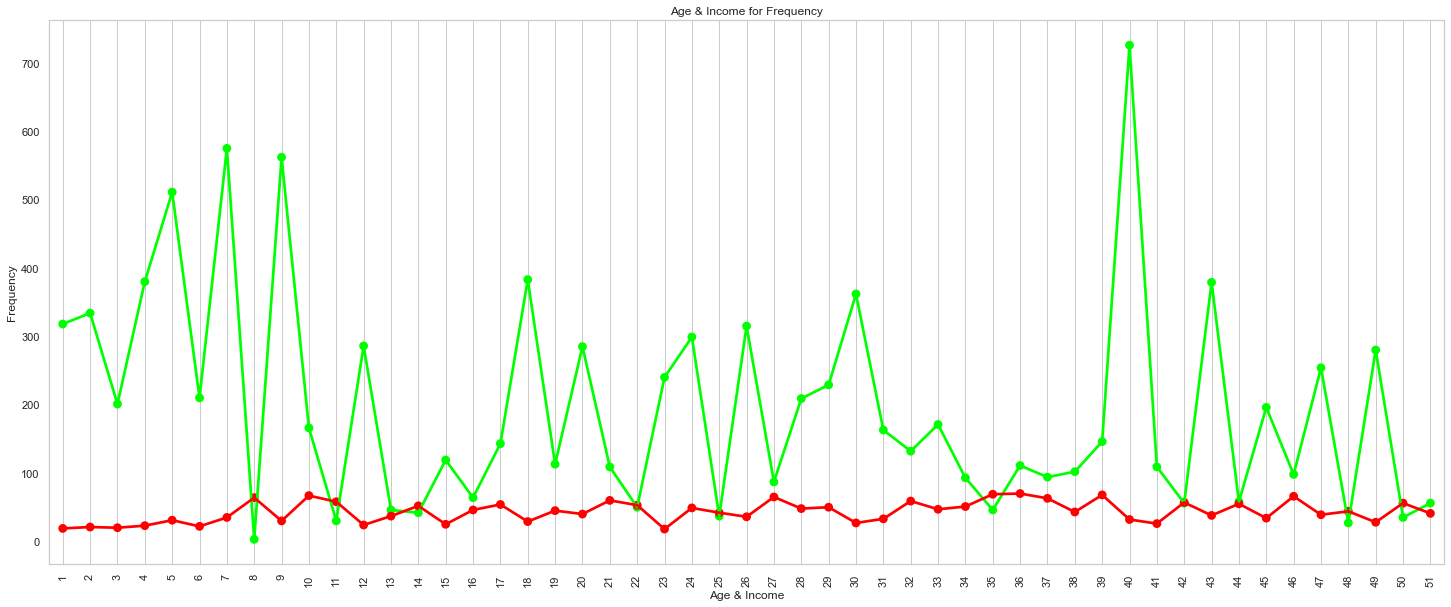

In [431]:
#Age show point plot
f,plt1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,52),y=age_income,color='lime',alpha=0.8,label='Income')
sns.pointplot(x=np.arange(1,52),y=age_unique,color='red',alpha=0.5,label='Age')
plt.xlabel('Age & Income')
plt.ylabel('Frequency')
plt.title('Age & Income for Frequency')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [432]:
age_female_income=[]
age_male_income=[]
for age in age_unique:
    age_male_income.append(sum(data[np.logical_and(data['Gender']=='Male',data['Age']==age)].SpendingScore))
    age_female_income.append(sum(data[np.logical_and(data['Gender']=='Female',data['Age']==age)].SpendingScore))

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Values')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Age Female & Age Male')

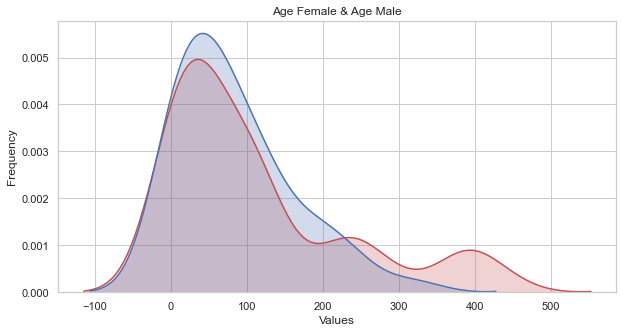

In [433]:
plt.figure(figsize=(10,5))
sns.kdeplot(age_female_income,shade=True,color='r')
sns.kdeplot(age_male_income,shade=True,color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Age Female & Age Male')
plt.show()

Text(0.5, 1.0, 'SpendingScore & Gender')

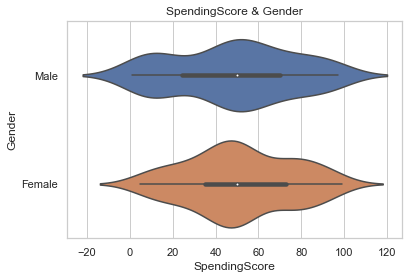

In [434]:
sns.violinplot(x=data['SpendingScore'],y=data['Gender'])
plt.title('SpendingScore & Gender')
plt.show()

Text(0.5, 1.0, 'SpendingScore & Gender')

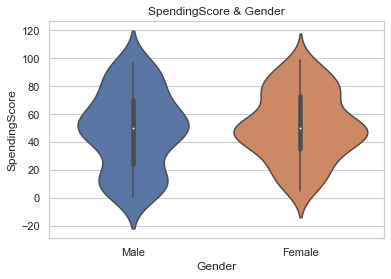

In [435]:
sns.violinplot(y=data['SpendingScore'],x=data['Gender'])
plt.title('SpendingScore & Gender')
plt.show()

In [436]:
age_female_spendingScore=[]
age_male_spendingScore=[]
for age in age_unique:
    age_male_spendingScore.append(sum(data[np.logical_and(data['Gender']=='Male',data['Age']==age)].SpendingScore))
    age_female_spendingScore.append(sum(data[np.logical_and(data['Gender']=='Female',data['Age']==age)].SpendingScore))

Text(0.5, 1.0, 'Female Spending Score')

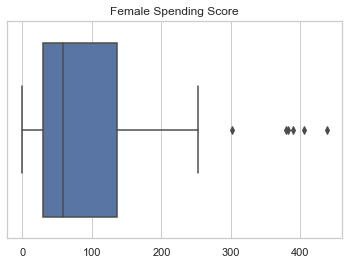

In [437]:
sns.set(style='whitegrid')
sns.boxplot(age_female_spendingScore)
plt.title('Female Spending Score')
plt.show()

Text(0.5, 1.0, 'Male Spending Score')

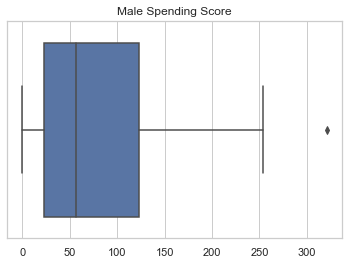

In [438]:
sns.set(style='whitegrid')
sns.boxplot(age_male_spendingScore)
plt.title('Male Spending Score')
plt.show()

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'SpendingScore')

Text(0.5, 1.0, 'Age & SpendingScore')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'SpendingScore')

Text(0.5, 1.0, 'Age & SpendingScore')

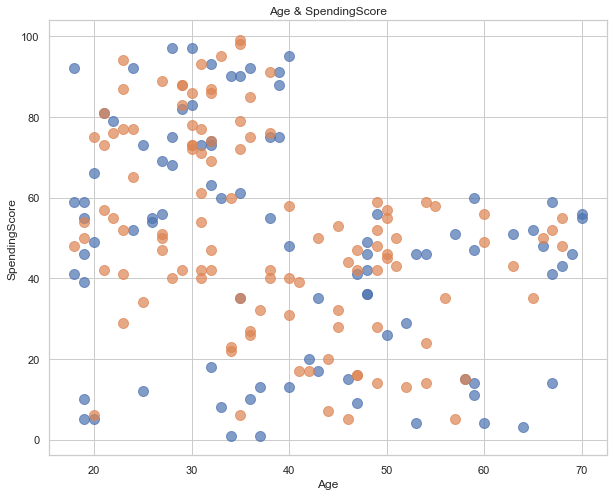

In [439]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='Age',y='SpendingScore',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('SpendingScore')
    plt.title('Age & SpendingScore')
plt.show()

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'SpendingScore')

Text(0, 0.5, 'AnnualIncome')

Text(0.5, 1.0, 'SpendingScore & AnnualIncome')

Text(0.5, 0, 'SpendingScore')

Text(0, 0.5, 'AnnualIncome')

Text(0.5, 1.0, 'SpendingScore & AnnualIncome')

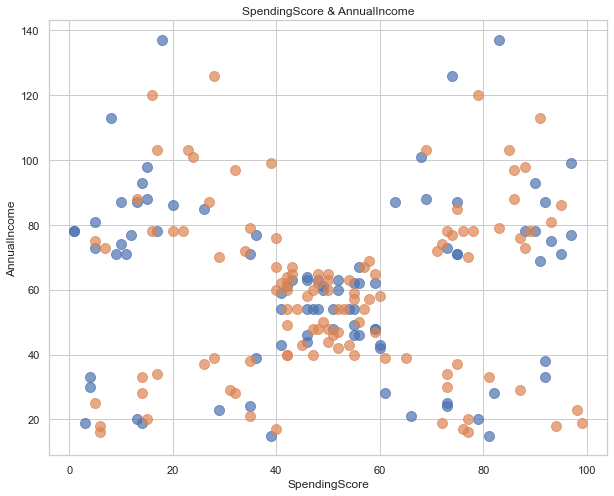

In [440]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='SpendingScore',y='AnnualIncome',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('SpendingScore')
    plt.ylabel('AnnualIncome')
    plt.title('SpendingScore & AnnualIncome')
plt.show()

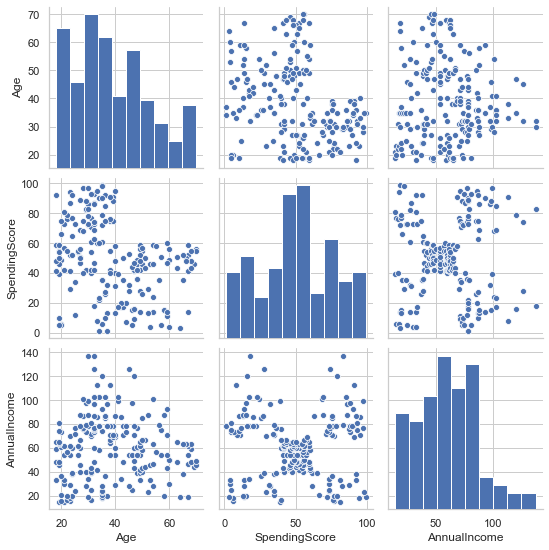

In [441]:
sns.pairplot(data[['Age','SpendingScore','AnnualIncome']])
plt.show()

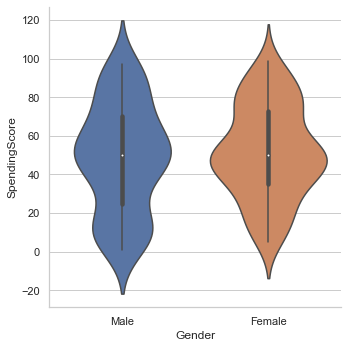

In [442]:
# facorplot
sns.factorplot(x="Gender", y="SpendingScore", kind='violin',data=data)
plt.show()

In [443]:
SpendingScore_32=0
SpendingScore_35=0
SpendingScore_19=0

SpendingScore_32=sum(data[data['Age']==32].SpendingScore)
SpendingScore_35=sum(data[data['Age']==35].SpendingScore)
SpendingScore_19=sum(data[data['Age']==19].SpendingScore)

Text(0.5, 1.0, 'First Popular Ages')

Text(0.5, 0, 'Ages')

Text(0, 0.5, 'Total SpendingScore')

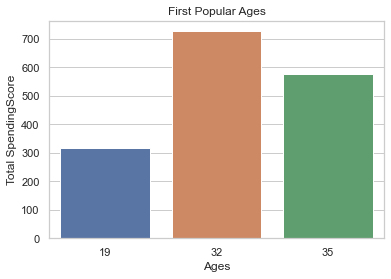

In [444]:
plt.title('First Popular Ages')
sns.barplot(x=['19','35','32'],y=[SpendingScore_19,SpendingScore_35,SpendingScore_32])
plt.xlabel('Ages')
plt.ylabel('Total SpendingScore')
plt.show()

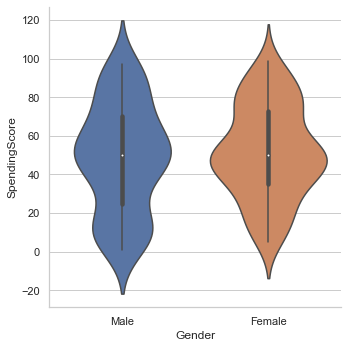

In [445]:
sns.factorplot(x="Gender", y="SpendingScore", kind='violin',data=data)
plt.show()

<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'SpendingScore & SpendingScore')

Text(0.5, 1.0, 'SpendingScore-SpendingScore vs Frequency')

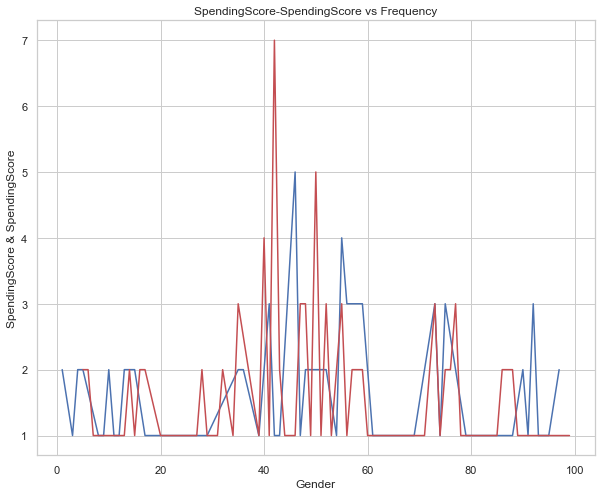

In [446]:
plt.figure(figsize=(10,8))
data[data['Gender']=='Male']['SpendingScore'].value_counts().sort_index().plot.line(color='b')
data[data['Gender']=='Female']['SpendingScore'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Gender')
plt.ylabel('SpendingScore & SpendingScore')
plt.title('SpendingScore-SpendingScore vs Frequency')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FFF601E48>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

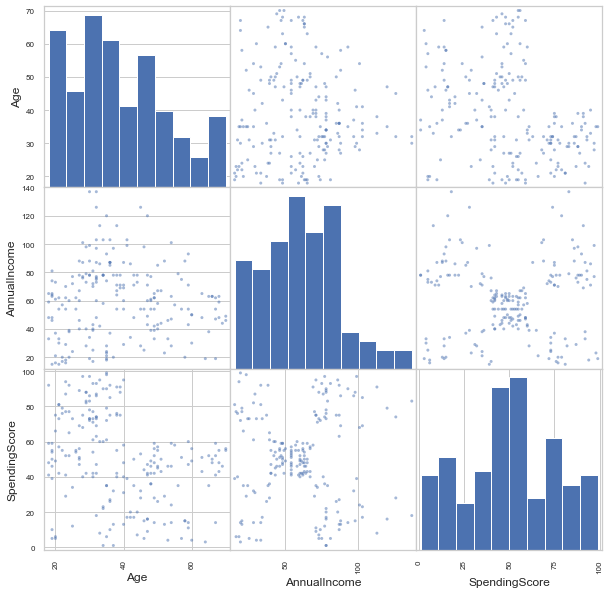

<Figure size 432x288 with 0 Axes>

In [447]:
pd.plotting.scatter_matrix(data,figsize=(10,10))
plt.figure()

In [448]:
data.columns

Index(['Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

# K-means clustering

Next we must plot Within Cluster Sum Of Squares (WCSS) against the the number of clusters 
(K Value) to figure out the optimal number of clusters value. WCSS measures sum of 
distances of observations from their cluster centroids.

Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'K Value')

([<matplotlib.axis.XTick at 0x22fffcac8c8>,
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'WCSS')

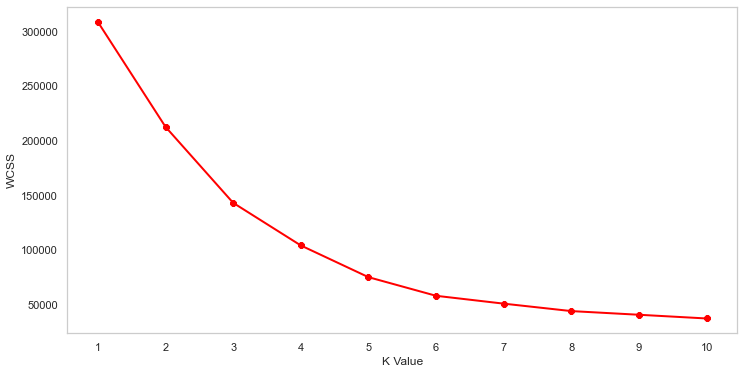

In [449]:
# elbow method to find the number of cluster
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Text(0.5, 0, 'Age')

Text(0, 0.5, 'SpendingScore')

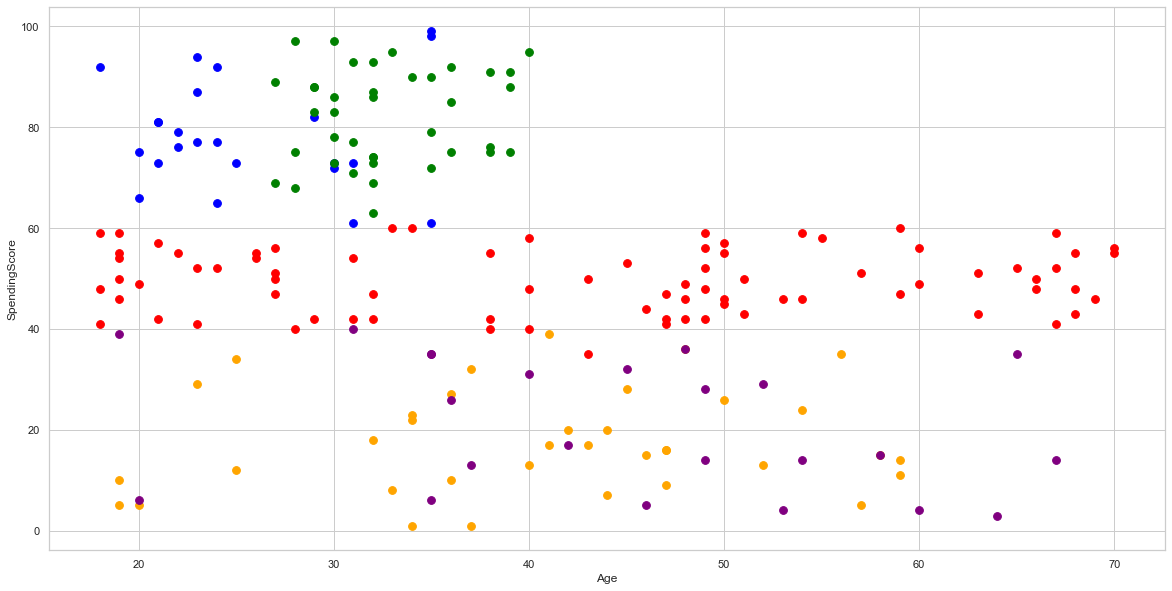

In [450]:
kms = KMeans(n_clusters=5)
clusters = kms.fit_predict(data.iloc[:,1:])
data["label"] = clusters


fig = plt.figure(figsize=(20,10))
plt.scatter(data.Age[data.label == 0], data["SpendingScore"][data.label == 0], c='blue', s=60)
plt.scatter(data.Age[data.label == 1], data["SpendingScore"][data.label == 1], c='red', s=60)
plt.scatter(data.Age[data.label == 2], data["SpendingScore"][data.label == 2], c='green', s=60)
plt.scatter(data.Age[data.label == 3], data["SpendingScore"][data.label == 3], c='orange', s=60)
plt.scatter(data.Age[data.label == 4], data["SpendingScore"][data.label == 4], c='purple', s=60)
plt.xlabel("Age")
plt.ylabel("SpendingScore")
plt.show()



Text(0.5, 0, 'Age')

Text(0, 0.5, 'SpendingScore')

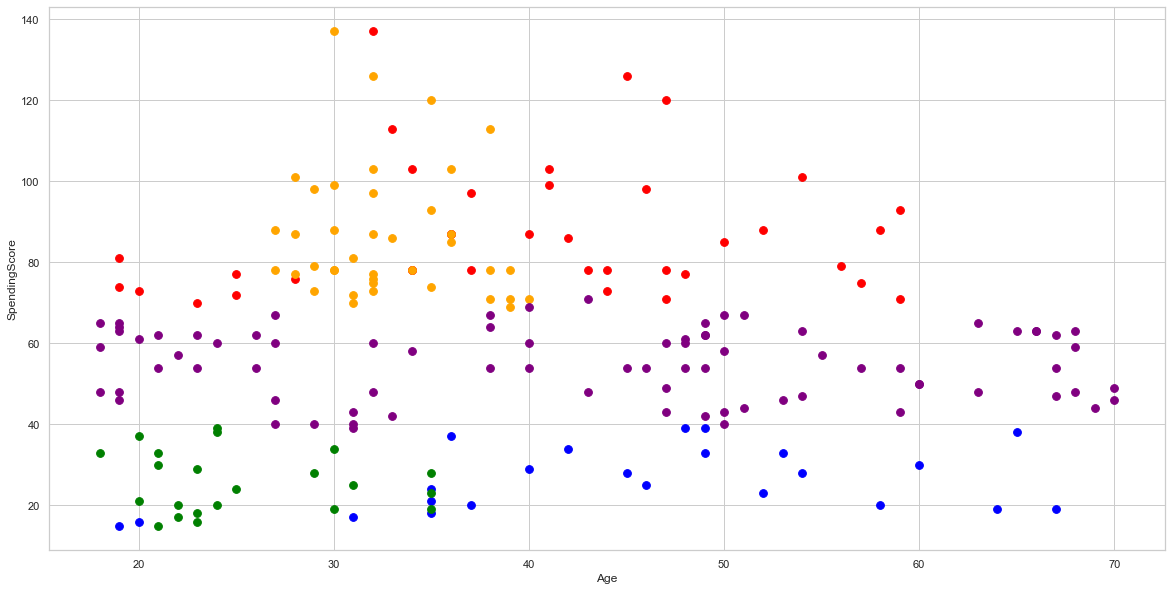

In [455]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data.Age[data.label == 0], data["AnnualIncome"][data.label == 0], c='blue', s=60)
plt.scatter(data.Age[data.label == 1], data["AnnualIncome"][data.label == 1], c='red', s=60)
plt.scatter(data.Age[data.label == 2], data["AnnualIncome"][data.label == 2], c='green', s=60)
plt.scatter(data.Age[data.label == 3], data["AnnualIncome"][data.label == 3], c='orange', s=60)
plt.scatter(data.Age[data.label == 4], data["AnnualIncome"][data.label == 4], c='purple', s=60)
plt.xlabel("Age")
plt.ylabel("AnnualIncome")
plt.show()


Text(0.5, 0, 'Age')

Text(0.5, 0, 'AnnualIncome')

Text(0.5, 0, 'SpendingScore')

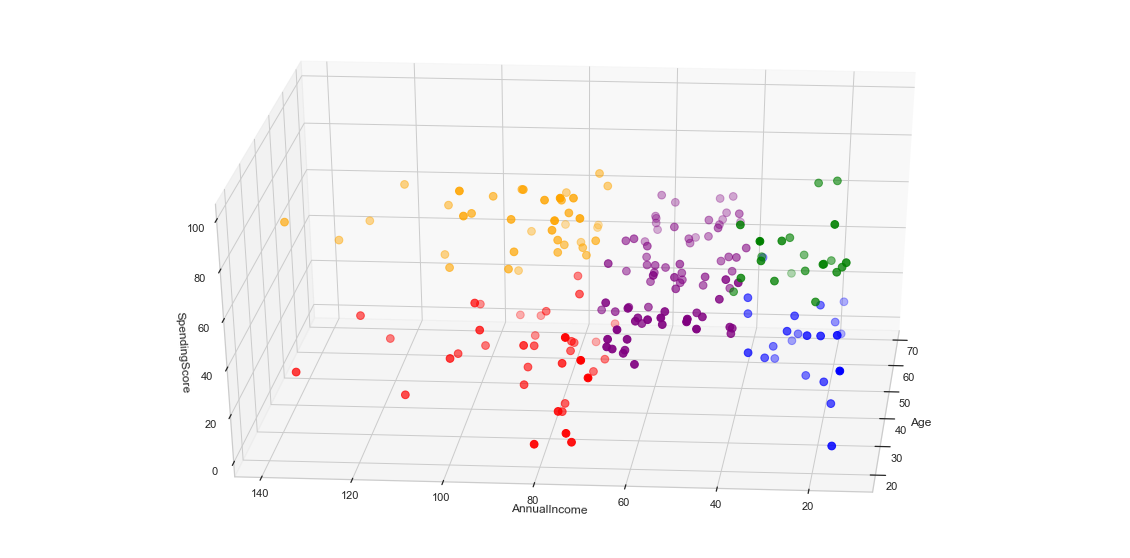

In [452]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["AnnualIncome"][data.label == 0], data["SpendingScore"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["AnnualIncome"][data.label == 1], data["SpendingScore"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["AnnualIncome"][data.label == 2], data["SpendingScore"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["AnnualIncome"][data.label == 3], data["SpendingScore"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data["AnnualIncome"][data.label == 4], data["SpendingScore"][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("AnnualIncome")
ax.set_zlabel('SpendingScore')
plt.show()

From this figure what we can see is 5 cluster is very useful for futher analysis.